# UCI Adult Income Dataset - Exploratory and Descriptive Analysis

This notebook is focused on the exploratory and descriptive analysis of the cleaned version of the UCI Adult Income Dataset.

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import os
import plotly.express as px

## Define and Create Paths

In [2]:
# Get working directory 
current_dir = os.getcwd()
# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
# Define paths to the data files
data_dir = os.path.join(project_root_dir,'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
#Define path to results folder
results_dir = os.path.join(project_root_dir, 'results')
# Define paths to results folder
docs_dir = os.path.join(project_root_dir,'docs')

# create directories if they do not exist
os.makedirs(raw_dir, exist_ok= True)
os.makedirs(processed_dir, exist_ok= True)
os.makedirs(results_dir, exist_ok= True)
os.makedirs(docs_dir, exist_ok= True)

## Read in the data

In [3]:
adult_data_filename = os.path.join(processed_dir,"adult_cleaned.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education-level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,secondary-school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,secondary-school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


## check the shape of the dataset and datatypes

In [4]:
adult_df.shape

(32513, 16)

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32513 non-null  int64 
 1   workclass           32513 non-null  object
 2   fnlwgt              32513 non-null  int64 
 3   education_num       32513 non-null  int64 
 4   marital_status      32513 non-null  object
 5   relationship        32513 non-null  object
 6   race                32513 non-null  object
 7   sex                 32513 non-null  object
 8   capital_gain        32513 non-null  int64 
 9   capital_loss        32513 non-null  int64 
 10  hours_per_week      32513 non-null  int64 
 11  income              32513 non-null  object
 12  education-level     32513 non-null  object
 13  occupation_grouped  32513 non-null  object
 14  native_region       32513 non-null  object
 15  age_group           32513 non-null  object
dtypes: int64(6), object(10

## Summary Statistics

**Numerical variables**

In [6]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Categorical Variables**

In [7]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education-level,occupation_grouped,native_region,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,6,4,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,secondary-school graduate,white collar,north america,26-35
freq,22650,14984,13178,27771,21758,24677,10484,16532,30018,8501


## Distributions

This help us to see different distribution from different categories in percentages.

In [8]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696644
government       0.133793
self-employed    0.112447
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [9]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460862
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
Name: proportion, dtype: float64

In [10]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [11]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income Distribution

In [12]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


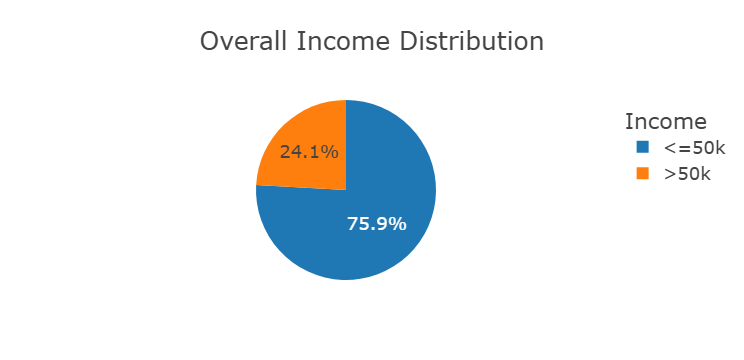

In [43]:
fig = px.pie(adult_df_income, names='income', values='total', title='Overall Income Distribution')
fig.update_layout(template='presentation', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', legend_title=dict(text='Income'))
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_pie_chart.html'))

## Income by Age group

In [15]:
adult_df_income_age = adult_df.groupby(['age_group', 'income']).size().reset_index(name='total_by_age')
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [16]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group) * 100
adult_df_income_age


,age_group,income,total_by_age,percentage
0,18-25,<=50k,5333,97.907105
1,18-25,>50k,114,2.092895
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


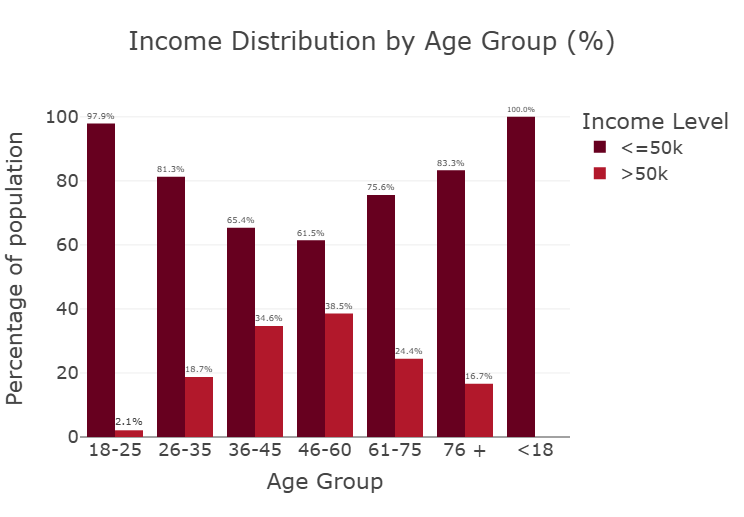

In [45]:
fig = px.bar(
    adult_df_income_age, 
    x = 'age_group', 
    y = 'percentage', 
    color = 'income', 
    title= 'Income Distribution by Age Group (%)', 
    barmode= 'group', 
    height= 500, 
    width= 1000, 
    color_discrete_sequence= px.colors.sequential.RdBu, 
    text= 'percentage' 
)
fig.update_traces(texttemplate = '%{text:.1f}%',textposition='outside')
fig.update_layout(template='presentation',xaxis_title='Age Group',
                  yaxis_title='Percentage of population',
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', legend_title=dict(text='Income Level'))
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by_agegroup_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by_agegroup_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by_agegroup_bar_plot.html'))

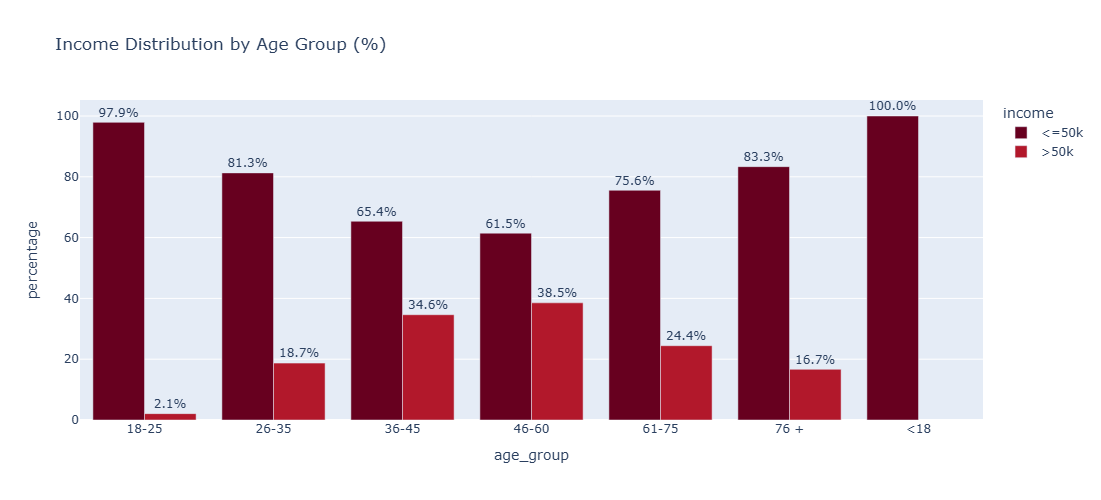

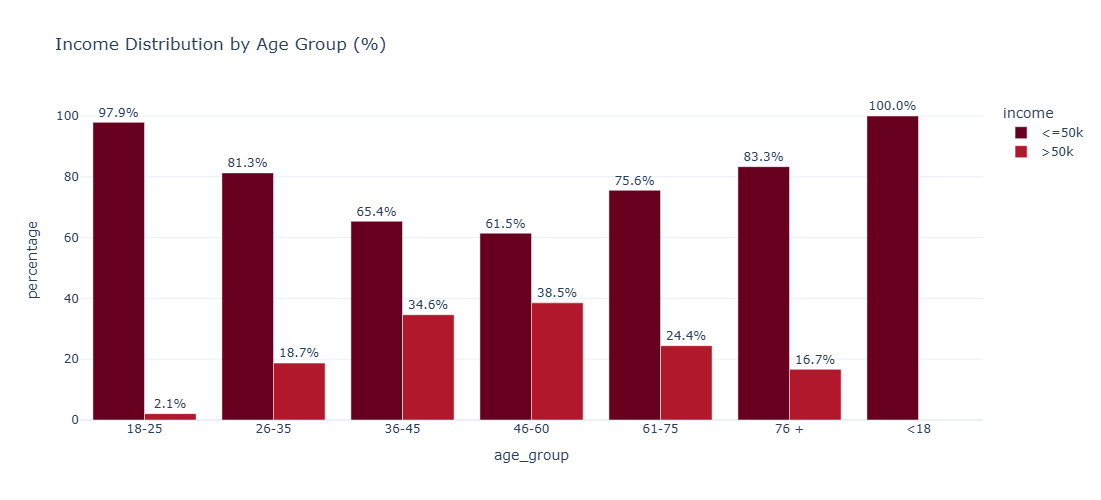

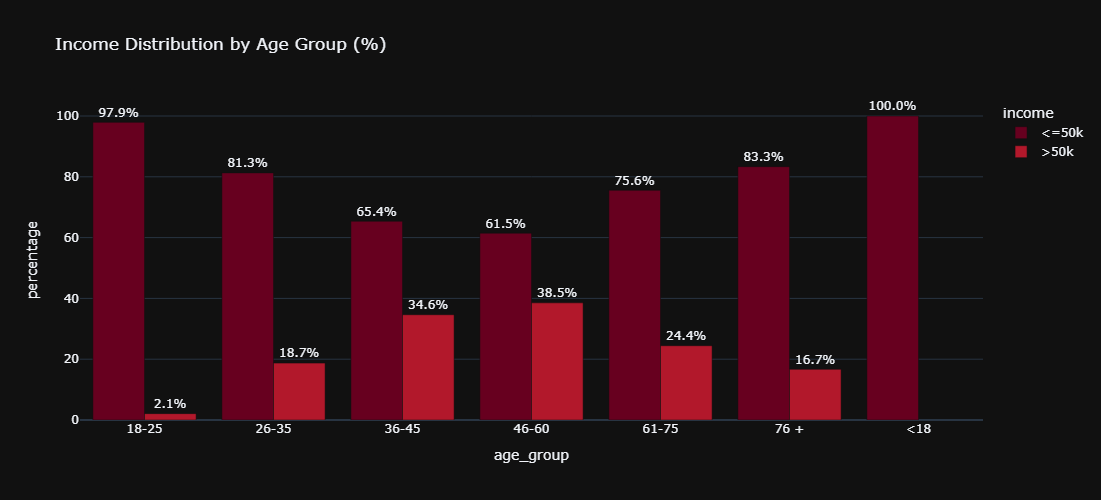

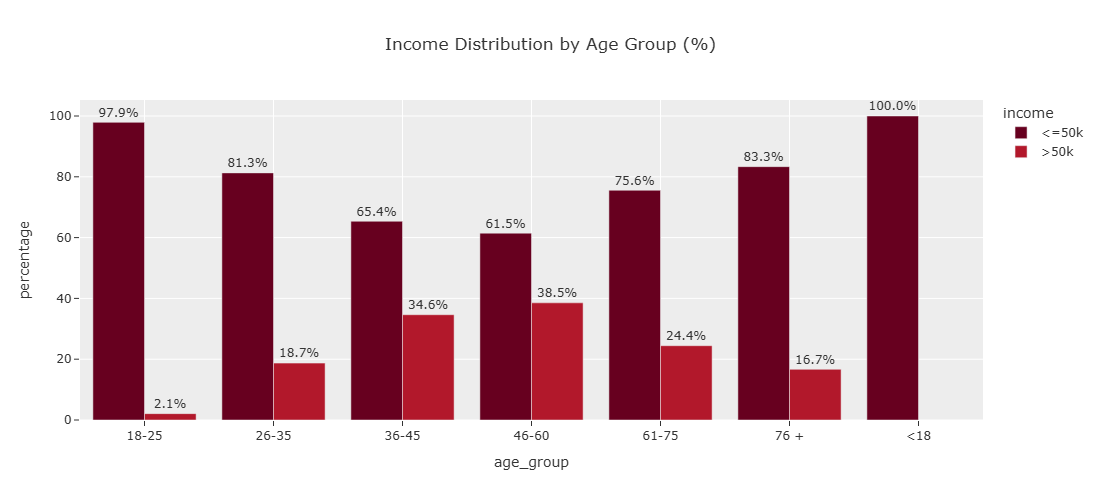

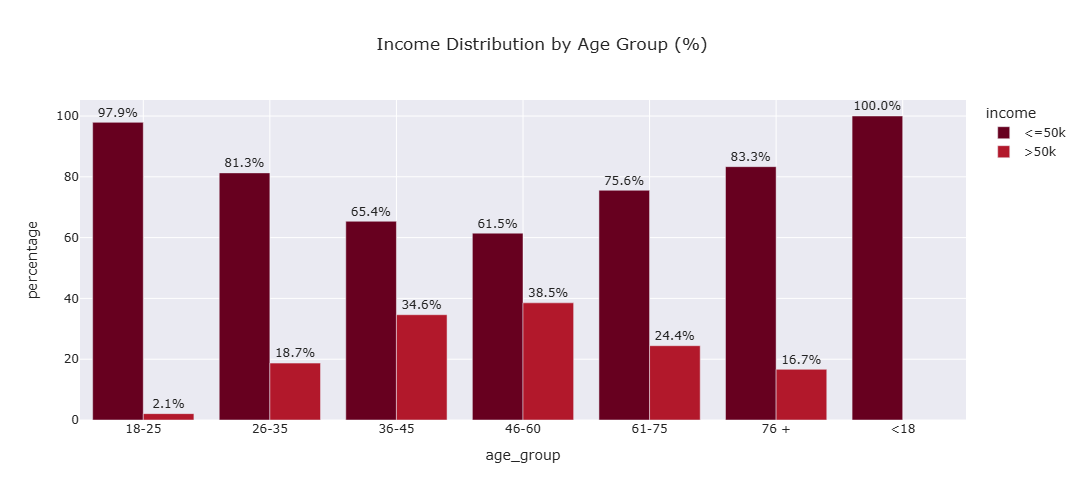

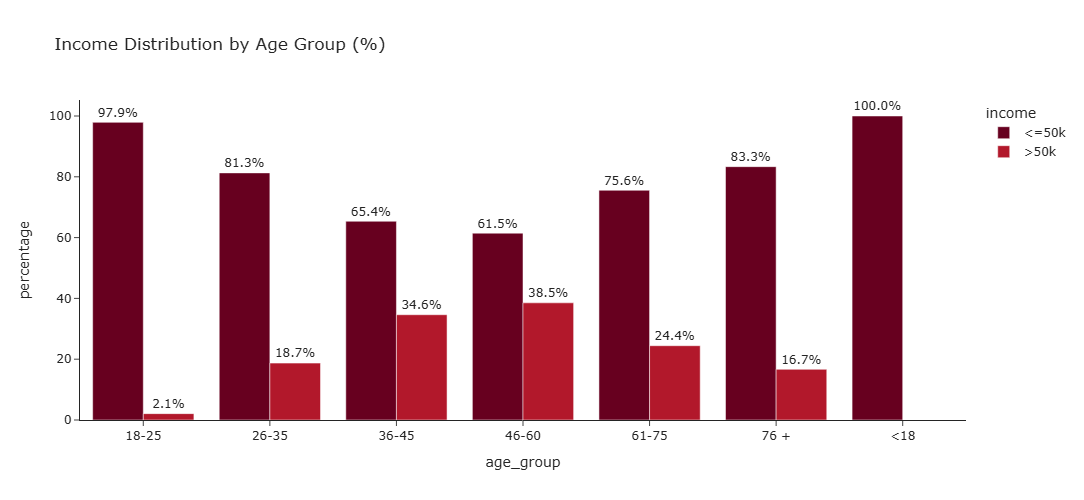

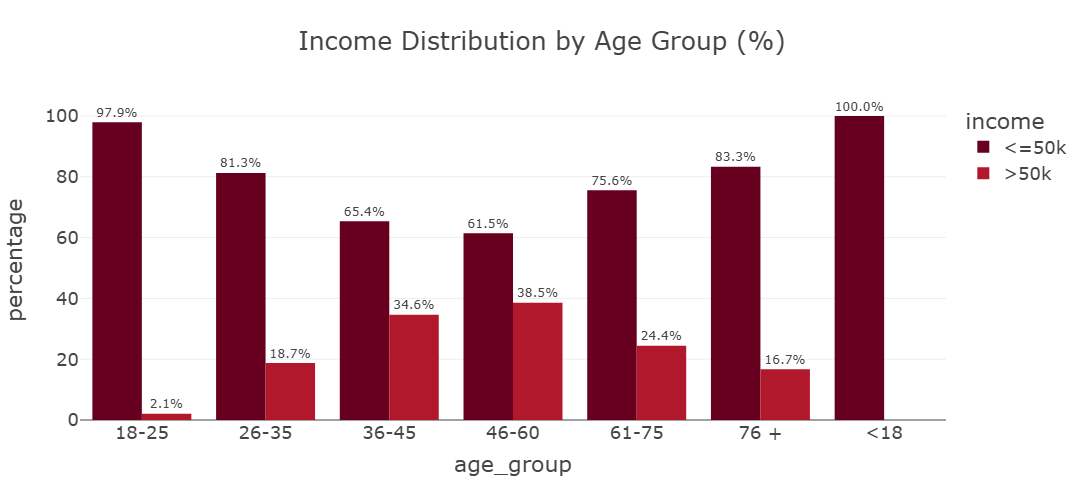

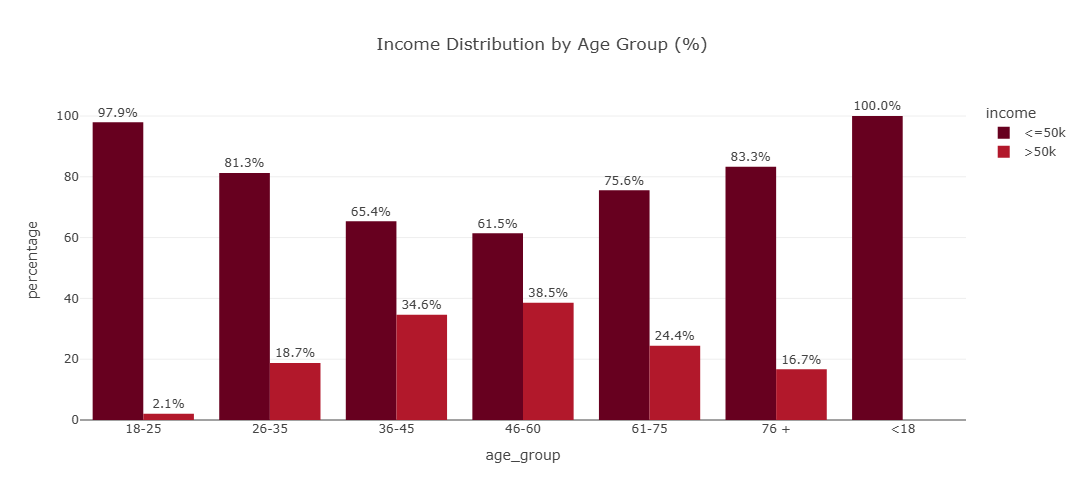

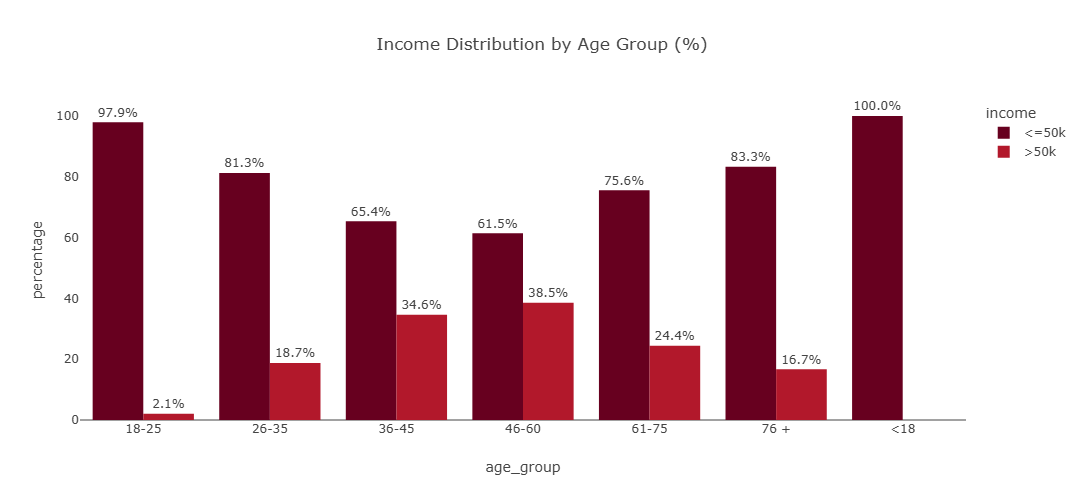

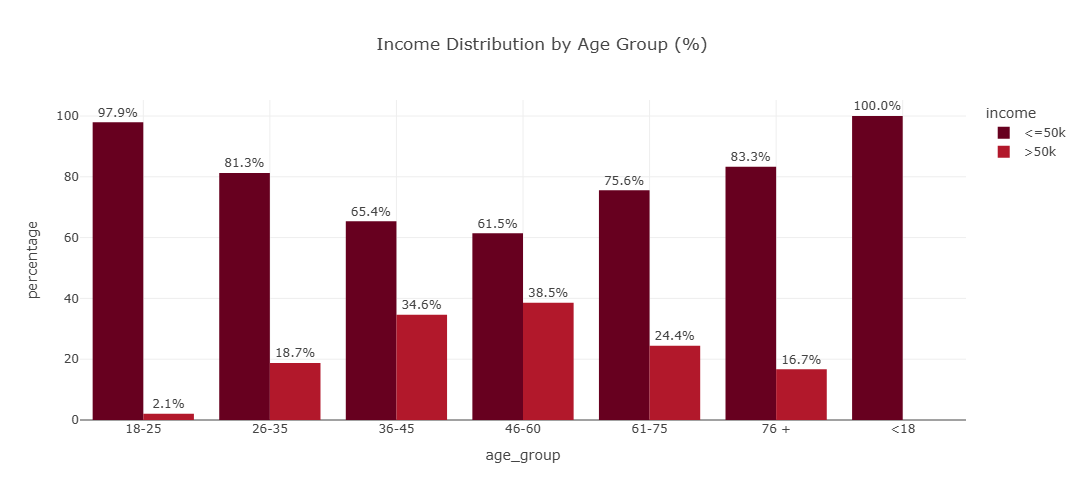

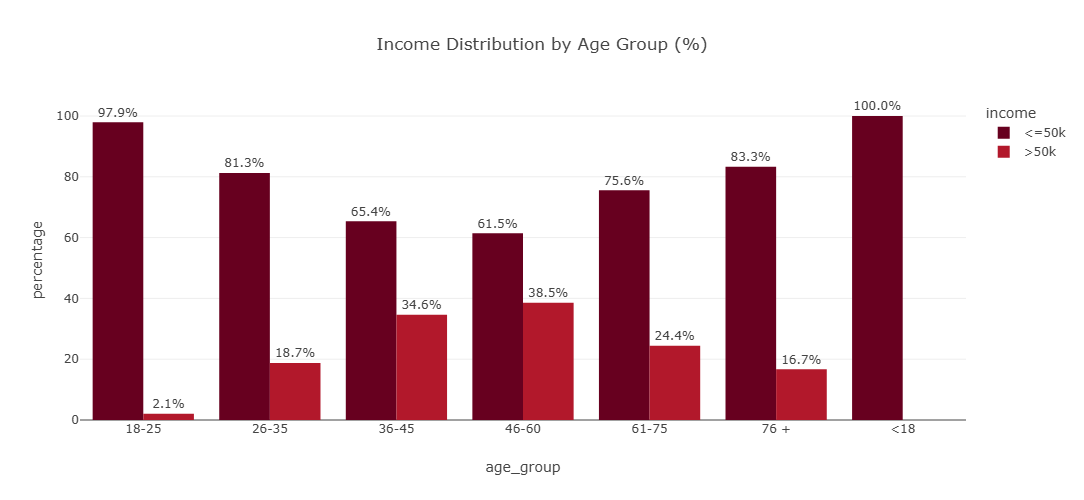

In [18]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "presentation", "xgridoff", "ygridoff", "gridon", "none"]

for theme in themes:
    fig.update_layout(template=theme)

    fig.show()

## Income Distribution by Native region

In [19]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22768
7,north america,>50k,7250
8,other,<=50k,435
9,other,>50k,146


In [23]:
total_per_region = adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage'] = (adult_df_income_native_region['total_income_distr']/total_per_region) * 100
adult_df_income_native_region

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22768,75.847825
7,north america,>50k,7250,24.152175
8,other,<=50k,435,74.870912
9,other,>50k,146,25.129088


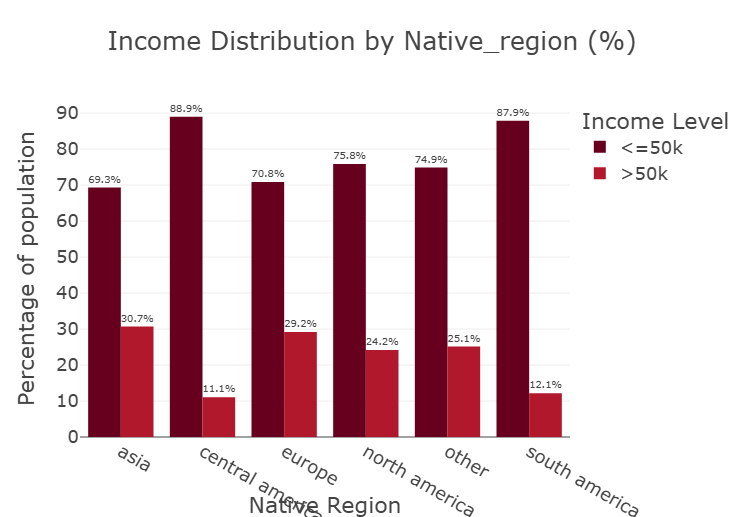

In [48]:
fig = px.bar(
    adult_df_income_native_region, 
    x = 'native_region', 
    y = 'percentage', 
    color = 'income', 
    title= 'Income Distribution by Native_region (%)', 
    barmode= 'group', 
    height= 500, 
    width= 1000, 
    color_discrete_sequence= px.colors.sequential.RdBu, 
    text= 'percentage' 
)
fig.update_traces(texttemplate = '%{text:.1f}%', textposition='outside')
fig.update_layout(template='presentation',xaxis_title='Native Region',
                  yaxis_title='Percentage of population',
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', legend_title=dict(text='Income Level'))
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by_nativeregion_bar_plot.html'))

## Income Distribution by Race

In [26]:
adult_df_income_race= adult_df.groupby(['race', 'income']).size().reset_index(name='total_income')
adult_df_income_race

,race,income,total_income
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20659
9,white,>50k,7112


In [27]:
total_per_race = adult_df_income_race.groupby('race')['total_income'].transform('sum')
adult_df_income_race['percentage'] = (adult_df_income_race['total_income']/total_per_race) * 100
adult_df_income_race

,race,income,total_income,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20659,74.390551
9,white,>50k,7112,25.609449


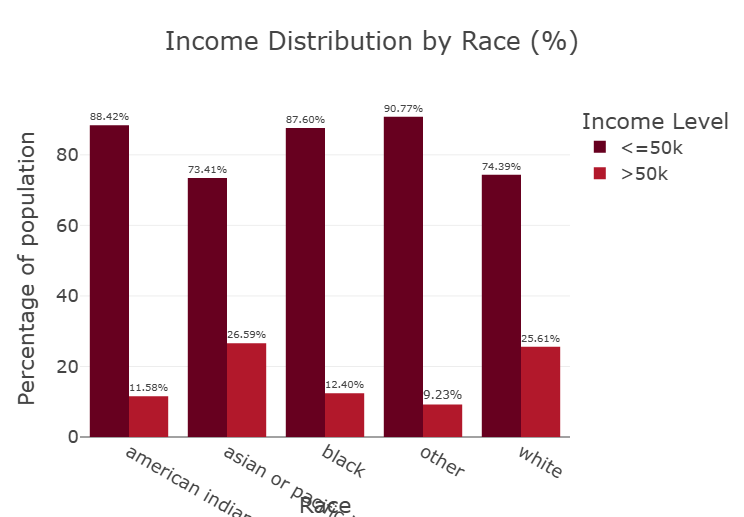

In [50]:
fig = px.bar(
    adult_df_income_race, 
    x = 'race', 
    y = 'percentage', 
    color = 'income', 
    title= 'Income Distribution by Race (%)', 
    barmode= 'group', 
    height= 500, 
    width= 1000, 
    color_discrete_sequence= px.colors.sequential.RdBu, 
    text= 'percentage' 
)
fig.update_traces(texttemplate = '%{text:.2f}%',textposition='outside')
fig.update_layout(template='presentation',xaxis_title='Race',
                  yaxis_title='Percentage of population',
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', legend_title=dict(text='Income Level'))
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by_race_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by_race_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by_race_bar_plot.html'))

In [34]:
adult_df_income_edu_occ = adult_df.groupby(['education-level', 'occupation_grouped', 'income']).size().reset_index(name= 'total').sort_values('total', ascending = True)
adult_df_income_edu_occ

,education-level,occupation_grouped,income,total
22,secondary,military,<=50k,1
15,primary,service,>50k,1
49,tertiary,military,<=50k,1
50,tertiary,military,>50k,1
40,some college,military,<=50k,2
11,preschool,white collar,<=50k,3
31,secondary-school graduate,military,<=50k,4
17,primary,unknown,>50k,4
26,secondary,unknown,>50k,5
10,preschool,unknown,<=50k,5


In [37]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education-level'] + "|" + adult_df_income_edu_occ['occupation_grouped'])
adult_df_income_edu_occ

,education-level,occupation_grouped,income,total,edu_occ
22,secondary,military,<=50k,1,secondary|military
15,primary,service,>50k,1,primary|service
49,tertiary,military,<=50k,1,tertiary|military
50,tertiary,military,>50k,1,tertiary|military
40,some college,military,<=50k,2,some college|military
11,preschool,white collar,<=50k,3,preschool|white collar
31,secondary-school graduate,military,<=50k,4,secondary-school graduate|military
17,primary,unknown,>50k,4,primary|unknown
26,secondary,unknown,>50k,5,secondary|unknown
10,preschool,unknown,<=50k,5,preschool|unknown


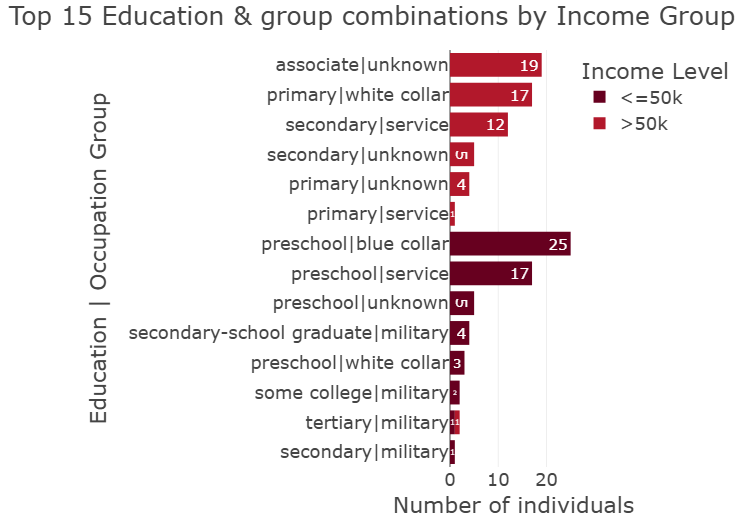

In [55]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num) 
fig = px.bar(
    adult_df_combos, 
    x = 'total', 
    y = 'edu_occ', 
    color = 'income', 
    orientation= 'h',
    title=f'Top {num} Education & group combinations by Income Group', 
    # barmode= 'group', 
    height= 500, 
    width= 1100, 
    color_discrete_sequence= px.colors.sequential.RdBu, 
    text= 'total' 
)
fig.update_layout(template = 'presentation',
                  xaxis_title ='Number of individuals',
                  yaxis_title = 'Education | Occupation Group', 
                  legend_title = dict(text = 'Income Level'), 
                  margin = dict(l=450, r=50, t=50, b=50),paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

fig.update_traces(textposition='inside')
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by_edu_groupcomb_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by_edu_groupcomb_bar_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by_edu_groupcomb_bar_plot.html'))